In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import to_rgb
import seaborn as sns
from pandas.plotting import scatter_matrix

# Frequency

In [2]:
df_fre = pd.read_csv('dane_pdf/frekfencja/frekfencja.csv', header=0)
#df_fre = df_fre.loc[df_fre['Rok']>2000,:]

In [3]:
df_par = df_fre.loc[df_fre['Wybory']=='Wybory parlamentarne',:].reset_index()
del df_par['index']
df_sam = df_fre.loc[df_fre['Wybory']=='Wybory samorządowe',:].reset_index()
del df_sam['index']
df_prez = df_fre.loc[df_fre['Wybory']=='Wybory prezydenckie',:].reset_index()
del df_prez['index']
df_pe = df_fre.loc[df_fre['Wybory']=='Wybory do Parlamentu Europejskiego',:].reset_index()
del df_pe['index']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


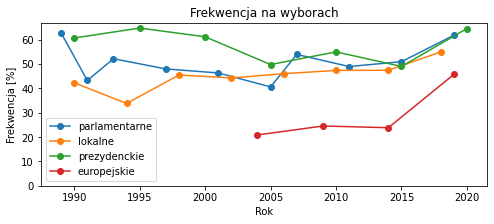

In [4]:
plt.figure(figsize=(8,3))
plt.plot(df_par['Rok'],df_par['Frekfencja'],'o-',label='parlamentarne')
plt.plot(df_sam['Rok'],df_sam['Frekfencja'],'o-',label='lokalne')
plt.plot(df_prez['Rok'],df_prez['Frekfencja'],'o-',label='prezydenckie')
plt.plot(df_pe['Rok'],df_pe['Frekfencja'],'o-',label='europejskie')
plt.ylim(0)
plt.title('Frekwencja na wyborach')
plt.xlabel('Rok')
plt.ylabel('Frekwencja [%]')
plt.legend()
#plt.savefig('dane_pdf/frekfencja/frekfencja_wybory_eng.png',  bbox_inches='tight')
plt.savefig('dane_pdf/frekfencja/frekfencja_wybory.eps',  bbox_inches='tight', format='eps')

# Sondaże

In [5]:
pool_df = pd.read_csv('dane_pdf/sondaze/Pools_poland.csv', index_col=0, header=0)

In [6]:
pool_df = pool_df.fillna(0)
pool_df = pool_df.replace(['-'], 0)

In [7]:
for c in pool_df.columns:
    pool_df[c] = pd.to_numeric(pool_df[c])
    #pool_df[c][:-1] = pool_df[c][:-1].apply(lambda x: x*pool_df[c][-1]/100 if pool_df[c][-1] > 0 else x)
    pool_df[c][:-1] = pool_df[c][:-1].apply(lambda x: x*pool_df[c][-1]/100 if pool_df[c][-1] > 0 else x)

<ipython-input-7-7b1d456b9af7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pool_df[c][:-1] = pool_df[c][:-1].apply(lambda x: x*pool_df[c][-1]/100 if pool_df[c][-1] > 0 else x)
/home/marek/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


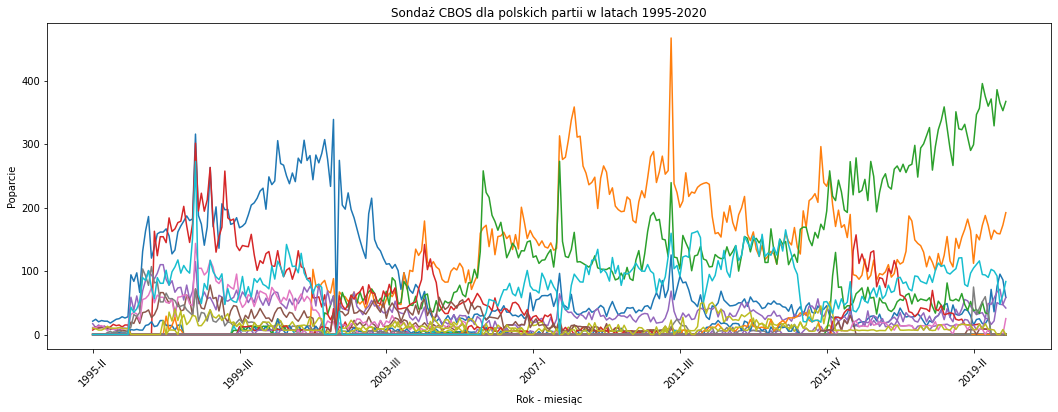

In [9]:
pool_df.iloc[:-1,:].T.plot(figsize=(18,6),legend=None)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xticks(rotation=45)
plt.title('Sondaż CBOS dla polskich partii w latach 1995-2020')
plt.xlabel('Rok - miesiąc')
plt.ylabel('Poparcie')
#plt.savefig('dane_pdf/sondaze/sondaze_dirty_eng.png',  bbox_inches='tight')
plt.savefig('dane_pdf/sondaze/sondaze_dirty.pdf',  bbox_inches='tight')#, format='eps')

In [10]:
#pool_df.index.values.tolist()

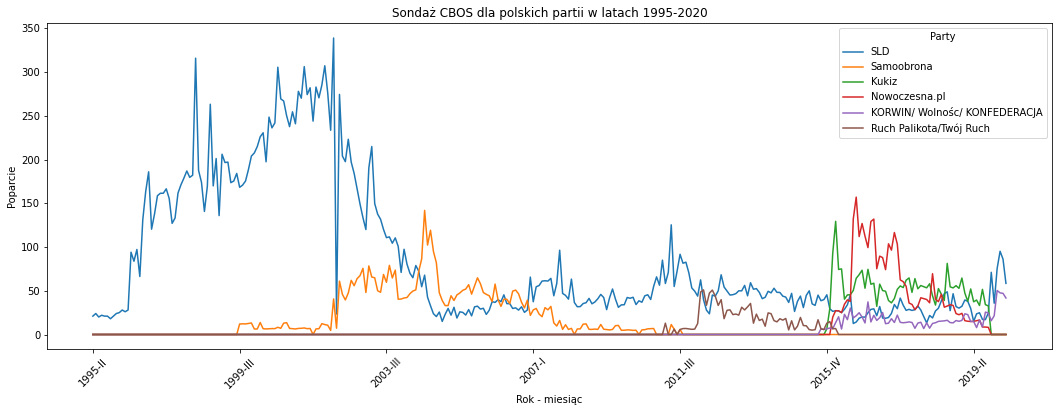

In [11]:
pool_df.loc[ [ 'SLD',
               'Samoobrona', 
               'Kukiz',
               'Nowoczesna.pl',
               'KORWIN/ Wolnośc/ KONFEDERACJA',
               'Ruch Palikota/Twój Ruch'
              ], :].T.plot(figsize=(18,6))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xticks(rotation=45)
plt.title('Sondaż CBOS dla polskich partii w latach 1995-2020')
plt.xlabel('Rok - miesiąc')
plt.ylabel('Poparcie')
plt.show()

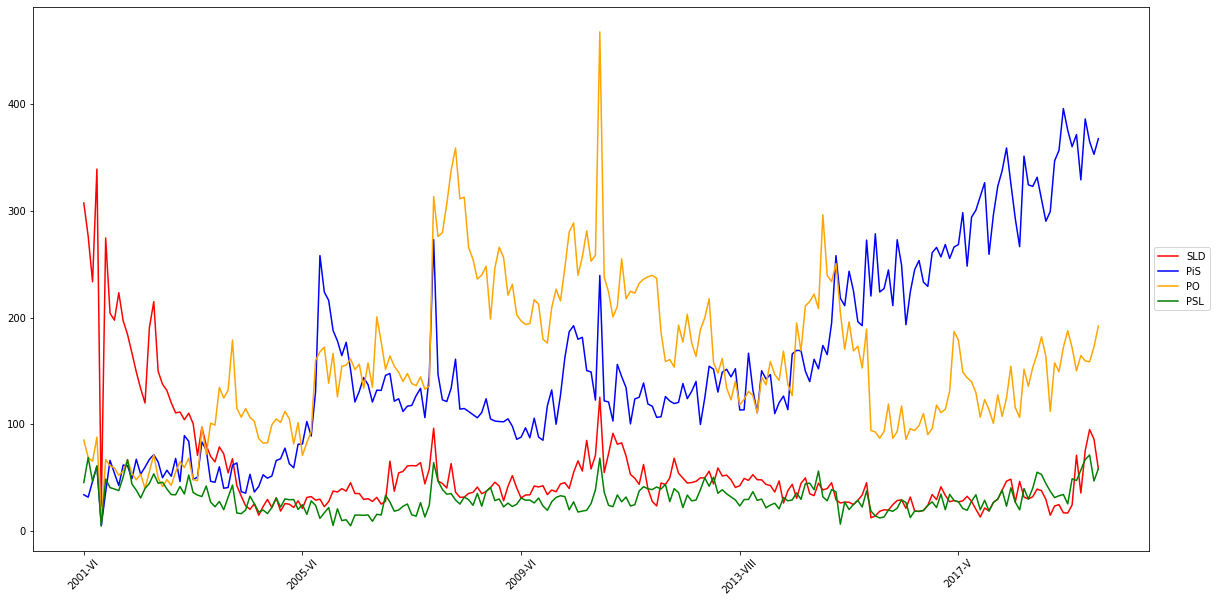

In [12]:
color=['r','b','orange','g']
pool_df.loc[:,pool_df.loc['PiS']>0].T[['SLD','PiS','PO','PSL']].plot(color=color, figsize=(20,10))
plt.legend(['SLD','PiS','PO','PSL'], loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xticks(rotation=45)
plt.show()

## Data aggregation - years

In [13]:
pool_df.columns = [c.split('-')[0] for c in pool_df.columns.values]
pool_df.columns

Index(['1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995',
       '1995',
       ...
       '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019',
       '2020'],
      dtype='object', length=312)

In [14]:
df_new = pool_df.T.reset_index().groupby(['index']).sum()

In [15]:
df_new = df_new.iloc[(2001-1995):,:-1]

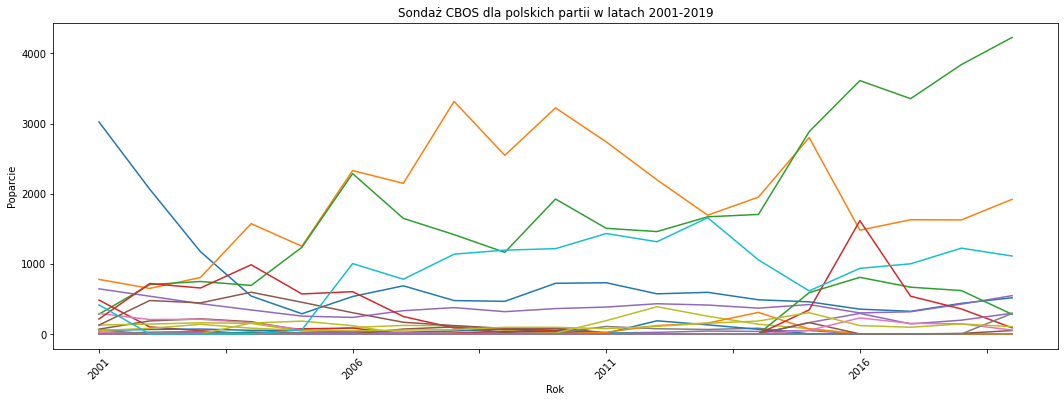

In [12]:
df_new.iloc[:-1,:].plot(figsize=(18,6),legend=None)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xticks(rotation=45)
plt.title('Sondaż CBOS dla polskich partii w latach 2001-2019')
plt.xlabel('Rok')
plt.ylabel('Poparcie')
#plt.savefig('dane_pdf/sondaze/sondaze_dirty_years_eng.png',  bbox_inches='tight')
plt.savefig('dane_pdf/sondaze/sondaze_years.pdf',  bbox_inches='tight')#, format='eps')

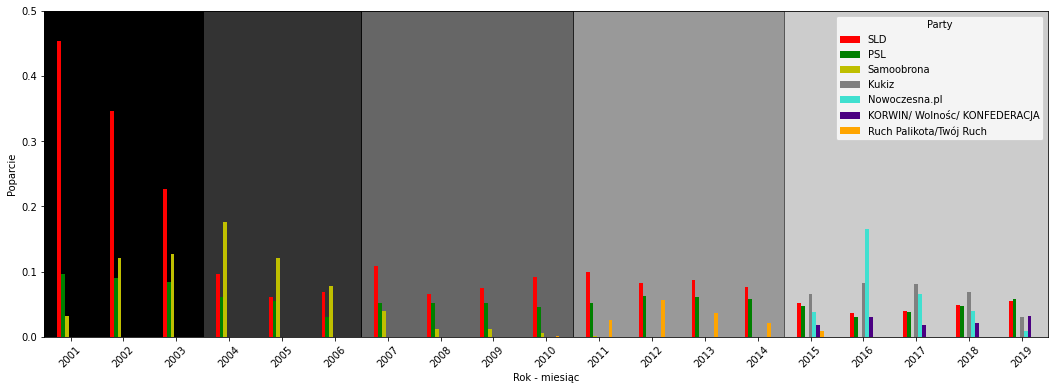

In [13]:
df_tmp = df_new.iloc[:-1,:]
df_tmp = df_tmp.div(df_tmp.sum(axis=1), axis=0).fillna(0)
df_tmp = df_tmp.loc[ :,
              ['SLD', 
               'PSL',
               'Samoobrona', 
               'Kukiz',
               'Nowoczesna.pl',
               'KORWIN/ Wolnośc/ KONFEDERACJA',
               'Ruch Palikota/Twój Ruch'
              ]]

fig,ax = plt.subplots(1)

ax.add_patch(Rectangle((-0.5, 0), 3, 0.5,alpha=1,color='k'))
ax.add_patch(Rectangle((2.5, 0), 3, 0.5,alpha=0.8,color='k'))
#ax.add_patch(Rectangle((4.5, 0), 1, 0.5,alpha=0.7,color='k'))
ax.add_patch(Rectangle((5.5, 0), 4, 0.5,alpha=0.6,color='k'))
ax.add_patch(Rectangle((9.5, 0), 4, 0.5,alpha=0.4,color='k'))
ax.add_patch(Rectangle((13.5, 0), 5, 0.5,alpha=0.2,color='k'))

#ax.text((-0.5+1.5)/2, 0.45, '2001', fontsize=15, color='white')

color = ['red', 'green', 'y', 'gray', 'turquoise', 'indigo', 'orange']
df_tmp.plot(figsize=(18,6), kind='bar', color=color, ax=ax)#, subplots=True)
#ax.plot([-1,19],[0.2,0.2], 'r--')

ax.set_ylim(0, 0.5)

plt.xticks(np.arange(0,19), np.arange(1,20)+2000, rotation=45)
#plt.title('Sondaż CBOS dla polskich partii w latach 2001-2018')
plt.xlabel('Rok - miesiąc')
plt.ylabel('Poparcie')
plt.savefig('dane_pdf/sondaze/sondaze_years_3rd_group.pdf',  bbox_inches='tight')#, format='eps')

In [14]:
col_totoal = df_new.columns.values.tolist()

In [15]:
df_new['Blue'] = 0
df_new['Red'] = 0
df_new['Gray'] = 0
df_new['Blue_mid'] = 0
df_new['Red_mid'] = 0
df_new['Gray_mid'] = 0

### 2001-2003

In [16]:
col_b = ['LPR','PSL','PiS','Samoobrona']
col_r = ['PO']
col_g = [c for c in col_totoal if c not in col_r+col_b+['SLD']]
df_new['Blue'][0:3] = df_new.loc[df_new.index[0:3], col_b].sum(axis = 1, skipna = True) 
df_new['Red'][0:3] = df_new.loc[df_new.index[0:3], col_r].sum(axis = 1, skipna = True) 
df_new['Gray'][0:3] = df_new.loc[df_new.index[0:3], col_g].sum(axis = 1, skipna = True) 

<ipython-input-16-01c81f96146b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Blue'][0:3] = df_new.loc[df_new.index[0:3], col_b].sum(axis = 1, skipna = True)
/home/marek/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-16-01c81f96146b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Red'][0:3] = df_

### 2004-2006

In [17]:
col_b = ['LPR','PSL','PiS','Samoobrona']
col_r = ['PO','SLD']
col_g = [c for c in col_totoal if c not in col_r+col_b]
df_new['Blue'][3:6] = df_new.loc[df_new.index[3:6], col_b].sum(axis = 1, skipna = True) 
df_new['Red'][3:6] = df_new.loc[df_new.index[3:6], col_r].sum(axis = 1, skipna = True) 
df_new['Gray'][3:6] = df_new.loc[df_new.index[3:6], col_g].sum(axis = 1, skipna = True) 

<ipython-input-17-6cd1621671f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Blue'][3:6] = df_new.loc[df_new.index[3:6], col_b].sum(axis = 1, skipna = True)
<ipython-input-17-6cd1621671f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Red'][3:6] = df_new.loc[df_new.index[3:6], col_r].sum(axis = 1, skipna = True)
<ipython-input-17-6cd1621671f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Gray'][3:6] =

### 2007-2010

In [18]:
col_b = ['PiS','PSL']
col_r = ['SLD','PO']
col_g = [c for c in col_totoal if c not in col_r+col_b]
df_new['Blue'][6:10] = df_new.loc[df_new.index[6:10], col_b].sum(axis = 1, skipna = True) 
df_new['Red'][6:10] = df_new.loc[df_new.index[6:10], col_r].sum(axis = 1, skipna = True) 
df_new['Gray'][6:10] = df_new.loc[df_new.index[6:10], col_g].sum(axis = 1, skipna = True) 

<ipython-input-18-2e6ecb10fe4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Blue'][6:10] = df_new.loc[df_new.index[6:10], col_b].sum(axis = 1, skipna = True)
<ipython-input-18-2e6ecb10fe4f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Red'][6:10] = df_new.loc[df_new.index[6:10], col_r].sum(axis = 1, skipna = True)
<ipython-input-18-2e6ecb10fe4f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Gray'][6:

### 2011-2014

In [19]:
col_b = ['PiS']
col_r = ['SLD','PO','Ruch Palikota/Twój Ruch','PSL']
col_g = [c for c in col_totoal if c not in col_r+col_b]
df_new['Blue'][10:14] = df_new.loc[df_new.index[10:14], col_b].sum(axis = 1, skipna = True) 
df_new['Red'][10:14] = df_new.loc[df_new.index[10:14], col_r].sum(axis = 1, skipna = True) 
df_new['Gray'][10:14] = df_new.loc[df_new.index[10:14], col_g].sum(axis = 1, skipna = True) 

<ipython-input-19-9745b5b5a270>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Blue'][10:14] = df_new.loc[df_new.index[10:14], col_b].sum(axis = 1, skipna = True)
<ipython-input-19-9745b5b5a270>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Red'][10:14] = df_new.loc[df_new.index[10:14], col_r].sum(axis = 1, skipna = True)
<ipython-input-19-9745b5b5a270>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Gray'

### 2015-2019

In [20]:
col_b = ['PiS','PSL','Kukiz','KORWIN/ Wolnośc/ KONFEDERACJA']#,'KORWIN/ Wolnośc/ KONFEDERACJA']
col_r = ['SLD','PO','Nowoczesna.pl','Wiosna','Razem']
col_g = [c for c in col_totoal if c not in col_r+col_b]
df_new['Blue'][14:] = df_new.loc[df_new.index[14:], col_b].sum(axis = 1, skipna = True) 
df_new['Red'][14:] = df_new.loc[df_new.index[14:], col_r].sum(axis = 1, skipna = True) 
df_new['Gray'][14:] = df_new.loc[df_new.index[14:], col_g].sum(axis = 1, skipna = True) 

<ipython-input-20-55a4eef566b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Blue'][14:] = df_new.loc[df_new.index[14:], col_b].sum(axis = 1, skipna = True)
<ipython-input-20-55a4eef566b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Red'][14:] = df_new.loc[df_new.index[14:], col_r].sum(axis = 1, skipna = True)
<ipython-input-20-55a4eef566b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Gray'][14:] =

In [23]:
df_ploting = df_new.iloc[:-1,-6:-3]
df_ploting.to_csv("dane_years/no_votes.csv")
df_ploting

Party,Blue,Red,Gray
index,,,
2001,1265.05,777.68,1602.34
2002,2437.49,649.54,824.63
2003,2278.04,805.18,906.98
2004,2615.24,2113.00,852.62
2005,2512.43,1537.83,649.02
2006,3427.62,2863.29,1426.06
2007,1979.25,2833.60,1494.10
2008,1791.84,3791.68,1691.95
2009,1480.98,3011.07,1701.43


In [22]:
df_ploting = df_ploting.div(df_ploting.sum(axis=1), axis=0).fillna(0)

In [42]:
df_ploting = df_ploting.sort_index()

In [44]:
df_ploting.to_csv("dane_years/percent_votes.csv")

In [39]:
w_2001 = pd.read_csv('wyniki_wyborow/Simple/2001_WS.csv', header=0).iloc[1,-3:]
w_2001 = w_2001.div(w_2001.sum()).fillna(0)
w_2001

Blue    0.619930
Red     0.236167
Gray    0.143903
Name: 1, dtype: float64

In [46]:
w_2005 = pd.read_csv('wyniki_wyborow/Simple/2005_WS.csv', header=0).iloc[:,-3:].sum(axis=0)
w_2005 = w_2005.div(w_2005.sum()).fillna(0)
w_2005

Blue    0.533305
Red     0.354480
Gray    0.112216
dtype: float64

In [48]:
w_2007 = pd.read_csv('wyniki_wyborow/Simple/2007_WS.csv', header=0).iloc[:,-3:].sum(axis=0)
w_2007 = w_2007.div(w_2007.sum()).fillna(0)
w_2007

Blue    0.410174
Red     0.546641
Gray    0.043185
dtype: float64

In [51]:
w_2011 = pd.read_csv('wyniki_wyborow/Simple/2011_WS.csv', header=0).iloc[:,-3:].sum(axis=0)
w_2011 = w_2011.div(w_2011.sum()).fillna(0)
w_2011

Blue    0.298898
Red     0.658004
Gray    0.043098
dtype: float64

In [54]:
w_2015 = pd.read_csv('wyniki_wyborow/Simple/2015_WS.csv', header=0).iloc[:,-3:].sum(axis=0)
w_2015 = w_2015.div(w_2015.sum()).fillna(0)
w_2015

Blue    0.515137
Red     0.392342
Gray    0.092520
dtype: float64

In [56]:
w_2019 = pd.read_csv('wyniki_wyborow/Simple/2019_WS.csv', header=0).iloc[:,-3:].sum(axis=0)
w_2019 = w_2019.div(w_2019.sum()).fillna(0)
w_2019

Blue    0.503981
Red     0.485029
Gray    0.010990
dtype: float64

In [67]:
wyn = pd.concat([w_2001, w_2005, w_2007, w_2011, w_2015, w_2019], axis=1)
wyn.columns = ['2001', '2005', '2007', '2011', '2015', '2019']
wyn

,2001,2005,2007,2011,2015,2019
Blue,0.619930,0.533305,0.410174,0.298898,0.515137,0.503981
Red,0.236167,0.354480,0.546641,0.658004,0.392342,0.485029
Gray,0.143903,0.112216,0.043185,0.043098,0.092520,0.010990


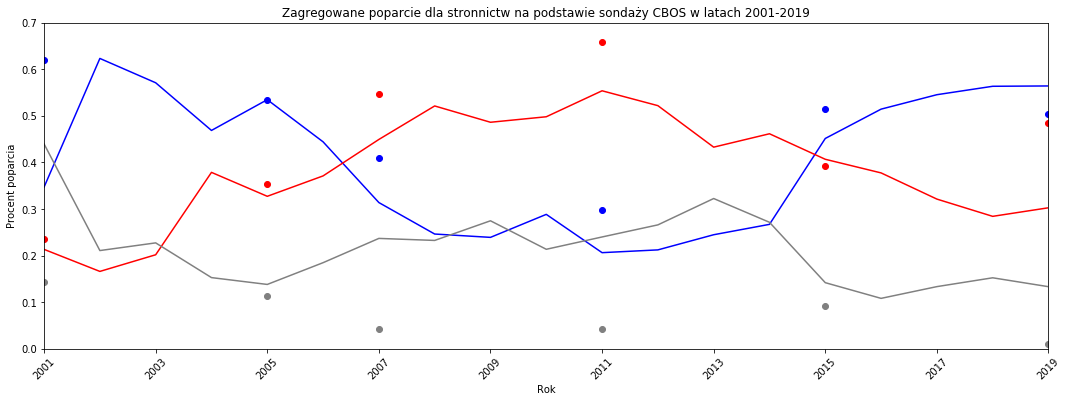

In [71]:
#plot.area()
fig, ax = plt.subplots()

df_ploting.plot(color=['b','r','gray'],figsize=(18,6), legend=None, sharex=True, ax=ax)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax.scatter(x=[0,4,6,10,14,18], y= wyn.iloc[0,:], c='b')
ax.scatter(x=[0,4,6,10,14,18], y= wyn.iloc[1,:], c='r')
ax.scatter(x=[0,4,6,10,14,18], y= wyn.iloc[2,:], c='gray')

#plt.plot()

plt.xticks(rotation=45)
plt.ylim(0,0.7)
plt.title('Zagregowane poparcie dla stronnictw na podstawie sondaży CBOS w latach 2001-2019')
plt.xlabel('Rok')
plt.ylabel('Procent poparcia')
plt.savefig('dane_pdf/sondaze/sondaze_years_clusters.pdf', bbox_inches='tight')#, format='eps')

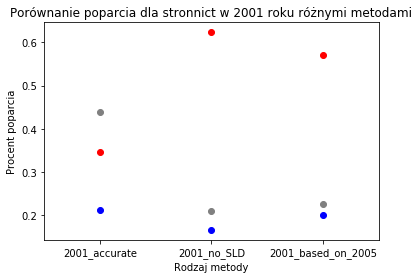

In [28]:
plt.plot([0,1,2], df_ploting.iloc[:3,0], 'or')
plt.plot([0,1,2], df_ploting.iloc[:3,1], 'ob')
plt.plot([0,1,2], df_ploting.iloc[:3,2], 'o', c='gray')

plt.xlim(-0.5,2.5)

plt.title('Porównanie poparcia dla stronnict w 2001 roku różnymi metodami')
plt.xlabel('Rodzaj metody')
plt.ylabel('Procent poparcia')

plt.xticks([0,1,2],['2001_accurate','2001_no_SLD','2001_based_on_2005'])
plt.savefig('dane_pdf/sondaze/sondaze_2001_diff_methods.pdf', bbox_inches='tight')#, format='eps')

In [30]:
df_ploting.to_csv('dane_years/pools_new_clustering.csv')

## More accurate poll data

### 2001-2006 no SLD

In [145]:
col_b = ['LPR','PSL','PiS','Samoobrona']
col_r = ['PO']
col_g = [c for c in col_totoal if c not in col_r+col_b+['SLD']]
df_new['Blue_mid'][0:6] = df_new.loc[df_new.index[0:6], col_b].sum(axis = 1, skipna = True) 
df_new['Red_mid'][0:6] = df_new.loc[df_new.index[0:6], col_r].sum(axis = 1, skipna = True) 
df_new['Gray_mid'][0:6] = df_new.loc[df_new.index[0:6], col_g].sum(axis = 1, skipna = True) 

/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 2007-2009

In [146]:
col_b = ['PiS','PSL']
col_r = ['SLD','PO','LiD']
col_g = [c for c in col_totoal if c not in col_r+col_b]
df_new['Blue_mid'][6:9] = df_new.loc[df_new.index[6:9], col_b].sum(axis = 1, skipna = True) 
df_new['Red_mid'][6:9] = df_new.loc[df_new.index[6:9], col_r].sum(axis = 1, skipna = True) 
df_new['Gray_mid'][6:9] = df_new.loc[df_new.index[6:9], col_g].sum(axis = 1, skipna = True) 

/home/marek/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


### 2010-2013

In [147]:
col_b = ['PiS']
col_r = ['SLD','PO','LiD','Ruch Palikota/Twój Ruch','PSL']
col_g = [c for c in col_totoal if c not in col_r+col_b]
df_new['Blue_mid'][9:13] = df_new.loc[df_new.index[9:13], col_b].sum(axis = 1, skipna = True) 
df_new['Red_mid'][9:13] = df_new.loc[df_new.index[9:13], col_r].sum(axis = 1, skipna = True) 
df_new['Gray_mid'][9:13] = df_new.loc[df_new.index[9:13], col_g].sum(axis = 1, skipna = True) 

/home/marek/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


### 2014-2017

In [148]:
col_b = ['PiS','PSL','Kukiz']#,'KORWIN/ Wolnośc/ KONFEDERACJA']
col_r = ['SLD','PO','Nowoczesna.pl']#,'Wiosna','Razem']
col_g = [c for c in col_totoal if c not in col_r+col_b]
df_new['Blue_mid'][13:17] = df_new.loc[df_new.index[13:17], col_b].sum(axis = 1, skipna = True) 
df_new['Red_mid'][13:17] = df_new.loc[df_new.index[13:17], col_r].sum(axis = 1, skipna = True) 
df_new['Gray_mid'][13:17] = df_new.loc[df_new.index[13:17], col_g].sum(axis = 1, skipna = True) 

### 2018-2020

In [149]:
col_b = ['PiS','KORWIN/ Wolnośc/ KONFEDERACJA']
col_r = ['SLD','PO','PSL']#,'Wiosna','Razem']
col_g = [c for c in col_totoal if c not in col_r+col_b]
df_new['Blue_mid'][17:] = df_new.loc[df_new.index[17:], col_b].sum(axis = 1, skipna = True) 
df_new['Red_mid'][17:] = df_new.loc[df_new.index[17:], col_r].sum(axis = 1, skipna = True) 
df_new['Gray_mid'][17:] = df_new.loc[df_new.index[17:], col_g].sum(axis = 1, skipna = True) 

In [150]:
df_ploting_2 = df_new.iloc[:-1,-3:]
df_ploting_2 = df_ploting_2.div(df_ploting_2.sum(axis=1), axis=0).fillna(0)

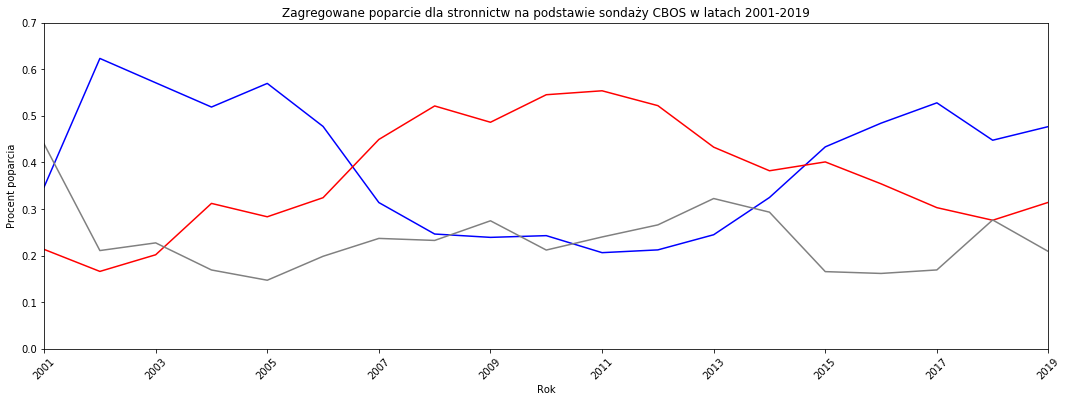

In [151]:
#plot.area()

df_ploting_2.plot(color=['b','r','gray'],figsize=(18,6), legend=None, sharex=True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.xticks(rotation=45)
plt.ylim(0,0.7)
plt.title('Zagregowane poparcie dla stronnictw na podstawie sondaży CBOS w latach 2001-2019')
plt.xlabel('Rok')
plt.ylabel('Procent poparcia')
plt.savefig('dane_pdf/sondaze/sondaze_years_clusters_middle_voting_year.pdf', bbox_inches='tight')#, format='eps')

In [152]:
df_ploting_2.to_csv('dane_years/pools_edited_middle_year_of_voting.csv')

### Heatmap

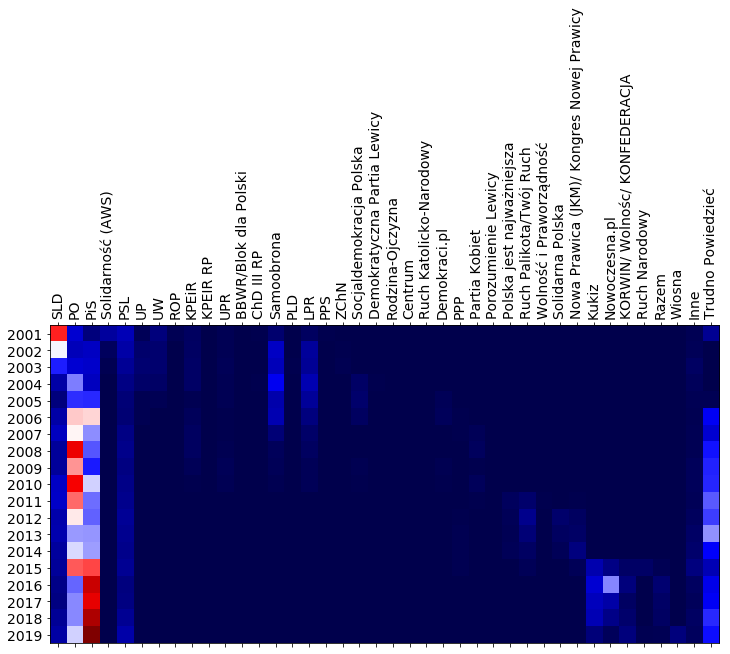

In [58]:
f = plt.figure(figsize=(15, 15))
plt.matshow(df_new.iloc[:-1,:-3], fignum=f.number,cmap='seismic')
plt.xticks(range(df_new.iloc[:-1,:-3].shape[1]), df_new.iloc[:-1,:-3].columns.values, fontsize=14, rotation=90)
plt.yticks(range(df_new.iloc[:-1,:-3].shape[0]), df_new.iloc[:-1,:-3].index.values, fontsize=14)
cb = plt.colorbar()
cb.remove()
cb.ax.tick_params(labelsize=10)

# Statistical data year by year

In [27]:
path = 'dane_years/'
files = list(filter(lambda x: os.path.isfile(path+x), os.listdir(path)))
files.sort()
files

['2001.csv',
 '2002.csv',
 '2003.csv',
 '2004.csv',
 '2005.csv',
 '2006.csv',
 '2007.csv',
 '2008.csv',
 '2009.csv',
 '2010.csv',
 '2011.csv',
 '2012.csv',
 '2013.csv',
 '2014.csv',
 '2015.csv',
 '2016.csv',
 '2017.csv',
 '2018.csv',
 'pools_edited.csv']

In [28]:
yr_list = [(lambda x: pd.read_csv(path+x,index_col=0, header=0))(f) for f in files[:-1]]

In [29]:
for yi in range(len(yr_list)):
    y = files[yi].split('.')[0]
    c = yr_list[yi].columns
    c = [y+'-'+ci for ci in c]
    # c = [y[2:]+'-'+str(ci) for ci in range(len(c))]
    yr_list[yi].columns = c

In [30]:
df_yr = pd.concat(yr_list, axis=1, sort=False)
df_yr = df_yr.dropna(axis='columns')

In [31]:
df_yr_scaled = df_yr / df_yr.max()

In [32]:
df_yr_scaled

,2001-emeryci_i_rencisci,2001-bezrobocie_zarejsestrowane,2001-malzenstwa_zawarte,2001-dochody_gminy,2001-wyksztalcenie_gim_pod_nizsze,2001-wyksztalcenie_srednie,2001-rozwody_powiat,2001-praca_najemna,2001-praca_wlasny_rachunek,2001-socjal,...,2018-rozwody_powiat,2018-udzial_wiek_przedprodukcyjny,2018-udzial_wiek_produkcyjny,2018-udzial_wiek_poprodukcyjny,2018-praca_najemna,2018-praca_wlasny_rachunek,2018-socjal_500plus,2018-socjal,2018-PKB_na_1_mieszkanca,2018-przestepstwa_ogolem
jednostka,,,,,,,,,,,,,,,,,,,,,
MAŁOPOLSKIE,0.684194,0.615666,0.649653,0.474158,0.738602,0.849112,0.377421,0.728840,0.785987,0.861968,...,0.462325,0.969388,0.983871,0.843882,0.782569,0.781085,0.831224,0.764644,0.572133,0.662219
ŚLĄSKIE,0.978570,0.905336,0.892075,0.836481,0.677812,0.931953,1.000000,0.852630,0.620205,1.000000,...,0.859100,0.867347,0.972581,0.953586,0.840657,0.507728,0.760983,1.000000,0.645658,0.976675
LUBUSKIE,0.200065,0.295237,0.184317,0.158825,0.744681,0.917160,0.232097,0.734198,0.865055,0.856056,...,0.171567,0.923469,0.983871,0.886076,0.828977,0.737190,0.895383,0.794809,0.511034,0.223009
WIELKOPOLSKIE,0.671868,0.685512,0.683248,0.506664,0.747720,0.872781,0.564180,0.706902,0.819909,0.830279,...,0.609864,0.984694,0.979032,0.839662,0.747182,0.585568,0.847853,0.767258,0.669339,0.531534
ZACHODNIOPOMORSKIE,0.304977,0.506593,0.309460,0.277003,0.835866,0.902367,0.334184,0.790305,0.731837,0.821686,...,0.344399,0.882653,0.980645,0.924051,0.844601,0.640649,0.645446,0.869462,0.515353,0.354457
DOLNOŚLĄSKIE,0.588495,0.772670,0.536344,0.492648,0.750760,0.902367,0.704249,0.780474,0.717405,0.905010,...,0.590157,0.867347,0.974194,0.953586,0.874673,0.615542,0.759245,0.859194,0.681654,0.662476
OPOLSKIE,0.183288,0.226966,0.182294,0.154542,0.775076,0.807692,0.202222,0.819269,0.434563,0.786646,...,0.159132,0.811224,1.000000,0.928270,0.674806,0.321734,0.875155,0.861166,0.492935,0.153602
KUJAWSKO-POMORSKIE,0.401270,0.592954,0.419867,0.320593,0.841945,0.798817,0.385077,0.704956,0.551622,0.801979,...,0.343661,0.918367,0.982258,0.886076,0.707932,0.419940,0.813105,0.833474,0.504009,0.386541
POMORSKIE,0.376686,0.507731,0.446247,0.360868,0.747720,0.917160,0.380123,0.868956,0.964722,0.792637,...,0.375066,1.000000,0.972581,0.843882,0.828416,0.841332,0.922686,0.798660,0.603279,0.402294


In [33]:
corr = df_yr_scaled.corr()
#corr.style.background_gradient(cmap='coolwarm')

In [36]:
#corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

In [65]:
wyniki_2005 = pd.read_csv("wyniki_wyborow/"+"2005_O"+".csv")
col = wyniki_2005.columns.values.tolist()
col[0] = 'jednostka'
wyniki_2005.columns = col
wyniki_2005['jednostka'] = [ w.replace('O_', '') for w in wyniki_2005['jednostka'] ]
wyniki_2005 = wyniki_2005.fillna(0)

df_jednostki = pd.read_csv('dane/_jednostki.csv', sep=';')
df_jednostki.okręgi = [ o.replace(' ', '_') for o in df_jednostki.okręgi ]
df_jednostki.województwo = [ w.upper() for w in df_jednostki.województwo ]

df_jednostki.loc[df_jednostki['województwo']=='WARSZAWA','województwo'] = 'MAZOWIECKIE'

wyn_05 = wyniki_2005.merge(df_jednostki,how='outer',left_on=['jednostka'],right_on=['okręgi'])

In [66]:
col_b = ['LPR','PSL','PiS','Samoobrona']
col_r = ['SLD','PO']
col_g = [c for c in col_totoal if c not in col_r+col_b+['jednostka','nr','okręgi','powiaty']]
wyn_05['Blue'] = wyn_05.loc[:, col_b].sum(axis = 1, skipna = True) 
wyn_05['Red'] = wyn_05.loc[:, col_r].sum(axis = 1, skipna = True) 
wyn_05['Gray'] = wyn_05.loc[:, col_g].sum(axis = 1, skipna = True) 

/home/marek/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [67]:
wyn_05 = wyn_05.groupby('województwo').agg(np.sum)
wyn_05 = wyn_05[['Blue','Red','Gray']]
wyn_05

,Blue,Red,Gray
województwo,,,
DOLNOŚLĄSKIE,403165.0,354677,8092.0
KUJAWSKO-POMORSKIE,301227.0,199374,8574.0
LUBELSKIE,464224.0,156883,4192.0
LUBUSKIE,134531.0,109282,2169.0
MAZOWIECKIE,978071.0,627435,12085.0
MAŁOPOLSKIE,648485.0,350577,9909.0
OPOLSKIE,114005.0,92401,1860.0
PODKARPACKIE,467906.0,162311,4233.0
PODLASKIE,208603.0,95218,4130.0


In [70]:
# aggregacja
#wyn_05 = wyn_05.groupby('województwo').agg(np.sum)[[]]#.reset_index()
#del wyn_05['nr']
wyn_05 = wyn_05.T
wyn_05 /= wyn_05.sum()
wyn_05 = wyn_05.T

df_yr05 = pd.concat([yr_list[1],yr_list[2],yr_list[3],yr_list[4],wyn_05], axis=1, sort=False)

In [71]:
#df_yr_scatter = yr_list[4].dropna(axis='columns')
#df_yr_scatter /= df_yr_scatter.sum()
df_yr05 = df_yr05.dropna(axis='columns')
corr05 = df_yr05.corr()
corr05.iloc[:19,19:].style.background_gradient(cmap='coolwarm').set_precision(2)

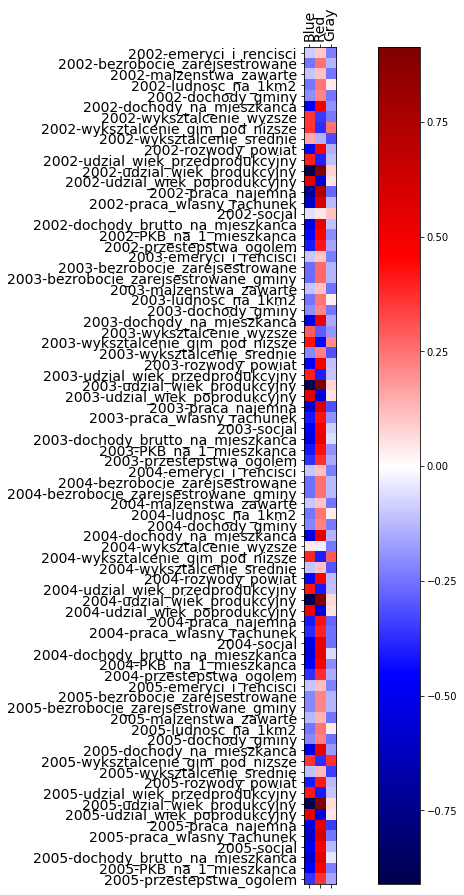

In [81]:
f = plt.figure(figsize=(15, 15))
plt.matshow(corr05.iloc[:-3,-3:], fignum=f.number,cmap='seismic')
plt.xticks(range(corr05.iloc[-3:,-3:].shape[1]), corr05.iloc[:-3,-3:].columns.values, fontsize=14, rotation=90)
plt.yticks(range(corr05.iloc[:-3,:-3].shape[1]), corr05.iloc[:-3,-3:].index.values, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.savefig('dane_years/img/correlatin_simplified_2005.eps',  bbox_inches='tight', format='eps')

In [64]:
wyniki_2019 = pd.read_csv("wyniki_wyborow/"+"2019_O"+".csv", delimiter =';').fillna(0).replace('-',0)
wyniki_2019

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Symbol kontrolny,Kod TERYT,Okręg,Numer,Typ obszaru,Typ obwodu,Siedziba,Gmina,Powiat,Województwo,...,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19,KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19,KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19,KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19,KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19,KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19,KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19
0,6a18-a07e-c240-e60e-2b2c-d9ee-4b6f-30b6,20101.0,1,1,miasto,stały,"Szkoła Podstawowa Nr 3, ul. Ceramiczna 5, 59-7...",m. Bolesławiec,bolesławiecki,dolnośląskie,...,202,0,72,46,0.0,368,0,145,49,0.0
1,87e0-d41a-ce4f-cde5-c934-67c7-4577-0bdd,20101.0,1,2,miasto,stały,"Szkoła Podstawowa Nr 3, ul. Ceramiczna 5, 59-7...",m. Bolesławiec,bolesławiecki,dolnośląskie,...,223,0,57,41,0.0,307,0,196,46,0.0
2,ec4f-7f57-b0eb-d14d-85b3-0095-8b38-265c,20101.0,1,3,miasto,stały,"Szkoła Podstawowa Nr 5, ul. Dolne Młyny 60, 59...",m. Bolesławiec,bolesławiecki,dolnośląskie,...,193,0,55,52,0.0,331,0,194,68,0.0
3,5440-a0cd-5860-fdab-0a77-7c24-e35d-da10,20101.0,1,4,miasto,stały,"Szkoła Podstawowa Nr 5, ul. Dolne Młyny 60, 59...",m. Bolesławiec,bolesławiecki,dolnośląskie,...,234,0,65,53,0.0,355,0,191,47,0.0
4,1ff9-1ec2-d664-fc91-5eee-71b7-d300-904e,20101.0,1,5,miasto,stały,"Szkoła Podstawowa Nr 5, ul. Dolne Młyny 60, 59...",m. Bolesławiec,bolesławiecki,dolnośląskie,...,215,0,33,54,0.0,288,0,176,53,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27410,ca04-d048-8fcf-7d31-cd72-0f6d-46d9-958a,0.0,19,119,zagranica,zagranica,"Novo Selo, Camp Maréshal de Lattre de Tassigny...",0,0,0,...,0,0,0,0,0.0,0,0,0,0,0.0
27411,1f5b-7d5a-492d-63c7-a3c7-55bf-3f78-be42,0.0,19,186,zagranica,zagranica,"Krajowa, Cercul Militar Craiova Strada Marin S...",0,0,0,...,0,0,0,0,0.0,0,0,0,0,0.0
27412,d679-7a93-db51-e54a-0307-64a2-e807-b316,0.0,19,88,zagranica,zagranica,"At-Taji, Camp Taji Joint Operations Base in Ta...",0,0,0,...,0,0,0,0,0.0,0,0,0,0,0.0
27413,40e4-6a02-9463-2c20-7a36-6b1d-a418-d65f,0.0,19,87,zagranica,zagranica,"Irbil, Agencja Konsularna RP Junction of Texas...",0,0,0,...,0,0,0,0,0.0,0,0,0,0,0.0
